Acknowledgement: This code was initially inspired by the lab "COMP34212_Lab2b_Keras_CNN_CIFAR_2025" before undergoing significant changes.

# Setup

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar100
from tensorflow.keras import utils
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, BatchNormalization, Dropout, SpatialDropout2D
from tensorflow.keras.layers import Conv2D, GlobalAveragePooling2D, Input, Add
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.callbacks import Callback, LearningRateScheduler, ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from tensorflow.keras.regularizers import l2
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix

print('Libraries imported.')

Libraries imported.


# Data Preperation

In [ ]:



cifar100_fine_labels = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle',
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel',
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock',
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster',
    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
    'worm'
]

cifar100_coarse_labels = [
    'aquatic mammals', 'fish', 'flowers', 'food containers', 'fruit and vegetables',
    'household electrical devices', 'household furniture', 'insects', 'large carnivores',
    'large man-made outdoor things', 'large natural outdoor scenes', 'large omnivores and herbivores',
    'medium-sized mammals', 'non-insect invertebrates', 'people', 'reptiles', 'small mammals',
    'trees', 'vehicles 1', 'vehicles 2'
]


fine_to_coarse_mapping = {
    0: 4, 1: 1, 2: 14, 3: 8, 4: 0, 5: 6, 6: 7, 7: 7,
    8: 18, 9: 3, 10: 3, 11: 14, 12: 9, 13: 18, 14: 7, 15: 11,
    16: 3, 17: 9, 18: 7, 19: 11, 20: 6, 21: 11, 22: 5, 23: 10,
    24: 7, 25: 6, 26: 13, 27: 15, 28: 3, 29: 15, 30: 0, 31: 11,
    32: 1, 33: 10, 34: 12, 35: 14, 36: 16, 37: 9, 38: 11, 39: 5,
    40: 5, 41: 19, 42: 8, 43: 8, 44: 15, 45: 13, 46: 14, 47: 17,
    48: 18, 49: 10, 50: 16, 51: 4, 52: 17, 53: 4, 54: 2, 55: 0,
    56: 17, 57: 4, 58: 18, 59: 17, 60: 10, 61: 3, 62: 2, 63: 12,
    64: 12, 65: 16, 66: 12, 67: 1, 68: 9, 69: 19, 70: 2, 71: 10,
    72: 0, 73: 1, 74: 16, 75: 12, 76: 9, 77: 13, 78: 15, 79: 13,
    80: 16, 81: 18, 82: 2, 83: 4, 84: 6, 85: 19, 86: 5, 87: 5,
    88: 8, 89: 19, 90: 18, 91: 1, 92: 2, 93: 15, 94: 6, 95: 0,
    96: 17, 97: 8, 98: 14, 99: 13
}

In [ ]:

BATCH_SIZE = 256
N_EPOCH = 150
N_CLASSES = 100
N_SUPERCLASSES = 20
VERBOSE = 1
VALIDATION_SPLIT = 0.2

print('Main variables initialised.')


IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32

print('Image variables initialisation')


Main variables initialised.
Image variables initialisation


In [ ]:

(input_X_train, output_y_train), (input_X_test, output_y_test) = cifar100.load_data(label_mode='fine')
print('input_X_train shape:', input_X_train.shape)
print(input_X_train.shape[0], 'train samples')
print(input_X_test.shape[0], 'test samples')


output_Y_train = utils.to_categorical(output_y_train, N_CLASSES)
output_Y_test = utils.to_categorical(output_y_test, N_CLASSES)


input_X_train = input_X_train.astype('float32')
input_X_test = input_X_test.astype('float32')
input_X_train /= 255
input_X_test /= 255


169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
input_X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


Sample input image class: apple


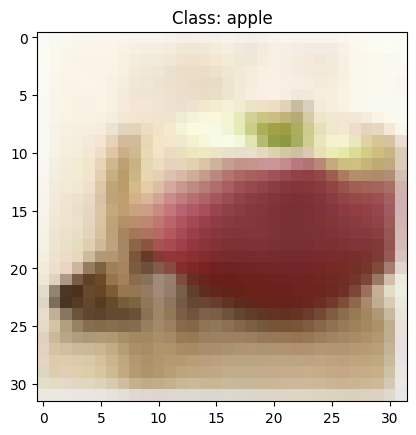

Sample input image class: boy


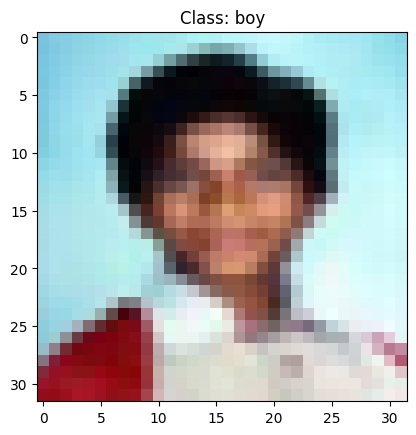

In [ ]:

Selected_Image = 2
image = input_X_train[Selected_Image]
print("Sample input image class:", cifar100_fine_labels[output_y_train[Selected_Image][0]])
plt.imshow(image)
plt.title(f"Class: {cifar100_fine_labels[output_y_train[Selected_Image][0]]}")
plt.show()

Selected_Image = 3
image = input_X_train[Selected_Image]
print("Sample input image class:", cifar100_fine_labels[output_y_train[Selected_Image][0]])
plt.imshow(image)
plt.title(f"Class: {cifar100_fine_labels[output_y_train[Selected_Image][0]]}")
plt.show()

## Data Augmentation

In [ ]:
seed = 42


train_datagen = ImageDataGenerator(
    horizontal_flip=True,
    width_shift_range=0.15,
    height_shift_range=0.15,
    rotation_range=15,
    validation_split=VALIDATION_SPLIT
)


validation_datagen = ImageDataGenerator(
    validation_split=VALIDATION_SPLIT
)


train_generator = train_datagen.flow(
    input_X_train,
    output_Y_train,
    batch_size=BATCH_SIZE,
    subset='training',
    shuffle=True,
    seed=seed
)

validation_generator = validation_datagen.flow(
    input_X_train,
    output_Y_train,
    batch_size=BATCH_SIZE,
    subset='validation',
    seed=seed
)



# Training

In [ ]:
def identity_block(x, filters, dropout_rate):
    x_skip = x


    x = Conv2D(filters, 3, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)


    x = Conv2D(filters, 3, padding='same')(x)
    x = BatchNormalization()(x)
    x = Dropout(dropout_rate)(x)


    x = Add()([x, x_skip])
    x = Activation('relu')(x)
    return x


In [ ]:
def conv_block(x, filters, stride, dropout_rate):
    x_skip = x


    x = Conv2D(filters, 3, strides=stride, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)


    x = Conv2D(filters, 3, padding='same')(x)
    x = BatchNormalization()(x)
    x = Dropout(dropout_rate)(x)


    x_skip = Conv2D(filters, 1, strides=stride, padding='same')(x_skip)
    x_skip = BatchNormalization()(x_skip)

    x = Add()([x, x_skip])
    x = Activation('relu')(x)
    return x


In [ ]:

inputs = Input(shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS))


x = Conv2D(64, 3, strides=1, padding='same')(inputs)
x = BatchNormalization()(x)
x = Activation('relu')(x)




x = conv_block(x, 64, stride=1, dropout_rate=0.3)
x = identity_block(x, 64, dropout_rate=0.3)


x = conv_block(x, 128, stride=2, dropout_rate=0.3)
x = identity_block(x, 128, dropout_rate=0.3)


x = conv_block(x, 256, stride=2, dropout_rate=0.3)
x = identity_block(x, 256, dropout_rate=0.3)


x = Dropout(0.2)(x)
x = GlobalAveragePooling2D()(x)
outputs = Dense(N_CLASSES, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

In [ ]:
class TrainingMonitor(Callback):
    def on_epoch_end(self, epoch, logs=None):
        lr = K.get_value(self.model.optimizer.learning_rate)
        print(f"\nEpoch {epoch+1}")
        print(f"LR: {lr:.1e}\n")
        print(f"  Training Loss: {logs['loss']:.4f} - Training Accuracy: {logs['accuracy']:.4f}")
        print(f"  Validation Loss: {logs['val_loss']:.4f} - Validation Accuracy: {logs['val_accuracy']:.4f}")
        if logs['accuracy'] - logs['val_accuracy'] > 0.15:
            print(f"! Overfitting: {logs['accuracy']-logs['val_accuracy']:.4f} gap")



In [ ]:

OPTIM1 = tf.keras.optimizers.AdamW(
    learning_rate=0.001,
    weight_decay=0.01,
    global_clipnorm=1.0,
)

model.compile(loss='categorical_crossentropy', optimizer=OPTIM1, metrics=['accuracy'])

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 32, 32, 3)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 32, 32, 64)     │          1,792 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 32, 32, 64)     │            256 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 32, 32, 64)     │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 32, 32, 64)     │         36,928 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 32, 32, 64)     │            256 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 32, 32, 64)     │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 32, 32, 64)     │         36,928 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 32, 32, 64)     │            256 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 32, 32, 64)     │          4,160 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 32, 32, 64)     │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 32, 32, 64)     │            256 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 32, 32, 64)     │              0 │ dropout[0][0],         │
│                           │                        │                │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 32, 32, 64)     │              0 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 32, 32, 64)     │         36,928 │ activation_2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 32, 32, 64)     │            256 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activat

 Total params: 2,811,940 (10.73 MB)

 Trainable params: 2,807,332 (10.71 MB)

 Non-trainable params: 4,608 (18.00 KB)

In [ ]:

early_stop = EarlyStopping(
    monitor='val_accuracy',
    mode='max',
    patience=10,
    restore_best_weights=True,
    start_from_epoch=10
)

In [ ]:
reduce_lr = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=6,
    min_lr=1e-6,
    mode='max',
    cooldown=1,
    verbose=1
)

In [ ]:

checkpoint = ModelCheckpoint(
    'best_model.h5',
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

In [ ]:
history = model.fit(
    train_generator,
    batch_size=BATCH_SIZE,
    epochs=N_EPOCH,
    validation_data=validation_generator,
    verbose=VERBOSE,
    callbacks=[
        early_stop,
        checkpoint,
        TrainingMonitor(),
        reduce_lr,
    ]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/150
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step - accuracy: 0.0735 - loss: 4.1849
Epoch 1: val_accuracy improved from -inf to 0.01050, saving model to best_model.h5



Epoch 1
LR: 1.0e-03

  Training Loss: 3.8920 - Training Accuracy: 0.1031
  Validation Loss: 7.8351 - Validation Accuracy: 0.0105
157/157 ━━━━━━━━━━━━━━━━━━━━ 71s 247ms/step - accuracy: 0.0737 - loss: 4.1830 - val_accuracy: 0.0105 - val_loss: 7.8351 - learning_rate: 0.0010
Epoch 2/150
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.1749 - loss: 3.4214
Epoch 2: val_accuracy improved from 0.01050 to 0.02800, saving model to best_model.h5



Epoch 2
LR: 1.0e-03

  Training Loss: 3.3182 - Training Accuracy: 0.1939
  Validation Loss: 5.4188 - Validation Accuracy: 0.0280
! Overfitting: 0.1659 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 129ms/step - accuracy: 0.1750 - loss: 3.4208 - val_accuracy: 0.0280 - val_loss: 5.4188 - learning_rate: 0.0010
Epoch 3/150
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 0.2509 - loss: 3.0243
Epoch 3: val_accuracy improved from 0.02800 to 0.12060, saving model to best_model.h5



Epoch 3
LR: 1.0e-03

  Training Loss: 2.9646 - Training Accuracy: 0.2587
  Validation Loss: 3.9057 - Validation Accuracy: 0.1206
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 133ms/step - accuracy: 0.2509 - loss: 3.0239 - val_accuracy: 0.1206 - val_loss: 3.9057 - learning_rate: 0.0010
Epoch 4/150
156/157 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.3057 - loss: 2.7267
Epoch 4: val_accuracy improved from 0.12060 to 0.23150, saving model to best_model.h5



Epoch 4
LR: 1.0e-03

  Training Loss: 2.6815 - Training Accuracy: 0.3156
  Validation Loss: 3.2073 - Validation Accuracy: 0.2315
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 131ms/step - accuracy: 0.3058 - loss: 2.7261 - val_accuracy: 0.2315 - val_loss: 3.2073 - learning_rate: 0.0010
Epoch 5/150
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.3554 - loss: 2.4837
Epoch 5: val_accuracy did not improve from 0.23150

Epoch 5
LR: 1.0e-03

  Training Loss: 2.4602 - Training Accuracy: 0.3625
  Validation Loss: 3.3022 - Validation Accuracy: 0.2274
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 132ms/step - accuracy: 0.3554 - loss: 2.4835 - val_accuracy: 0.2274 - val_loss: 3.3022 - learning_rate: 0.0010
Epoch 6/150
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.3906 - loss: 2.2966
Epoch 6: val_accuracy improved from 0.23150 to 0.30350, saving model to best_model.h5



Epoch 6
LR: 1.0e-03

  Training Loss: 2.2783 - Training Accuracy: 0.3952
  Validation Loss: 2.9922 - Validation Accuracy: 0.3035
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 128ms/step - accuracy: 0.3907 - loss: 2.2965 - val_accuracy: 0.3035 - val_loss: 2.9922 - learning_rate: 0.0010
Epoch 7/150
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.4281 - loss: 2.1453
Epoch 7: val_accuracy did not improve from 0.30350

Epoch 7
LR: 1.0e-03

  Training Loss: 2.1226 - Training Accuracy: 0.4313
  Validation Loss: 3.2186 - Validation Accuracy: 0.3027
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 128ms/step - accuracy: 0.4281 - loss: 2.1452 - val_accuracy: 0.3027 - val_loss: 3.2186 - learning_rate: 0.0010
Epoch 8/150
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.4566 - loss: 2.0116
Epoch 8: val_accuracy improved from 0.30350 to 0.34020, saving model to best_model.h5



Epoch 8
LR: 1.0e-03

  Training Loss: 2.0051 - Training Accuracy: 0.4582
  Validation Loss: 2.8749 - Validation Accuracy: 0.3402
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 127ms/step - accuracy: 0.4566 - loss: 2.0116 - val_accuracy: 0.3402 - val_loss: 2.8749 - learning_rate: 0.0010
Epoch 9/150
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.4833 - loss: 1.9041
Epoch 9: val_accuracy improved from 0.34020 to 0.38560, saving model to best_model.h5



Epoch 9
LR: 1.0e-03

  Training Loss: 1.8870 - Training Accuracy: 0.4839
  Validation Loss: 2.4906 - Validation Accuracy: 0.3856
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.4833 - loss: 1.9040 - val_accuracy: 0.3856 - val_loss: 2.4906 - learning_rate: 0.0010
Epoch 10/150
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.5104 - loss: 1.7828
Epoch 10: val_accuracy did not improve from 0.38560

Epoch 10
LR: 1.0e-03

  Training Loss: 1.7884 - Training Accuracy: 0.5086
  Validation Loss: 2.8885 - Validation Accuracy: 0.3571
! Overfitting: 0.1515 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 127ms/step - accuracy: 0.5104 - loss: 1.7828 - val_accuracy: 0.3571 - val_loss: 2.8885 - learning_rate: 0.0010
Epoch 11/150
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.5289 - loss: 1.6887
Epoch 11: val_accuracy improved from 0.38560 to 0.43260, saving model to best_model.h5



Epoch 11
LR: 1.0e-03

  Training Loss: 1.6987 - Training Accuracy: 0.5273
  Validation Loss: 2.2832 - Validation Accuracy: 0.4326
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 128ms/step - accuracy: 0.5289 - loss: 1.6887 - val_accuracy: 0.4326 - val_loss: 2.2832 - learning_rate: 0.0010
Epoch 12/150
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.5490 - loss: 1.6175
Epoch 12: val_accuracy did not improve from 0.43260

Epoch 12
LR: 1.0e-03

  Training Loss: 1.6338 - Training Accuracy: 0.5446
  Validation Loss: 2.5886 - Validation Accuracy: 0.4043
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 129ms/step - accuracy: 0.5490 - loss: 1.6176 - val_accuracy: 0.4043 - val_loss: 2.5886 - learning_rate: 0.0010
Epoch 13/150
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.5689 - loss: 1.5470
Epoch 13: val_accuracy did not improve from 0.43260

Epoch 13
LR: 1.0e-03

  Training Loss: 1.5539 - Training Accuracy: 0.5645
  Validation Loss: 2.4432 - Validation Accuracy: 0.4080
! Overfitting: 0.1565 gap
157/157 ━


Epoch 14
LR: 1.0e-03

  Training Loss: 1.4837 - Training Accuracy: 0.5796
  Validation Loss: 2.3646 - Validation Accuracy: 0.4441
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 128ms/step - accuracy: 0.5824 - loss: 1.4639 - val_accuracy: 0.4441 - val_loss: 2.3646 - learning_rate: 0.0010
Epoch 15/150
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.5990 - loss: 1.4099
Epoch 15: val_accuracy improved from 0.44410 to 0.48770, saving model to best_model.h5



Epoch 15
LR: 1.0e-03

  Training Loss: 1.4163 - Training Accuracy: 0.5979
  Validation Loss: 1.9628 - Validation Accuracy: 0.4877
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 131ms/step - accuracy: 0.5990 - loss: 1.4099 - val_accuracy: 0.4877 - val_loss: 1.9628 - learning_rate: 0.0010
Epoch 16/150
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.6176 - loss: 1.3352
Epoch 16: val_accuracy did not improve from 0.48770

Epoch 16
LR: 1.0e-03

  Training Loss: 1.3537 - Training Accuracy: 0.6131
  Validation Loss: 2.3205 - Validation Accuracy: 0.4569
! Overfitting: 0.1562 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 128ms/step - accuracy: 0.6176 - loss: 1.3353 - val_accuracy: 0.4569 - val_loss: 2.3205 - learning_rate: 0.0010
Epoch 17/150
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.6316 - loss: 1.2900
Epoch 17: val_accuracy improved from 0.48770 to 0.49560, saving model to best_model.h5



Epoch 17
LR: 1.0e-03

  Training Loss: 1.3016 - Training Accuracy: 0.6284
  Validation Loss: 2.1687 - Validation Accuracy: 0.4956
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 131ms/step - accuracy: 0.6316 - loss: 1.2901 - val_accuracy: 0.4956 - val_loss: 2.1687 - learning_rate: 0.0010
Epoch 18/150
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.6397 - loss: 1.2337
Epoch 18: val_accuracy did not improve from 0.49560

Epoch 18
LR: 1.0e-03

  Training Loss: 1.2595 - Training Accuracy: 0.6350
  Validation Loss: 2.1795 - Validation Accuracy: 0.4910
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 133ms/step - accuracy: 0.6397 - loss: 1.2338 - val_accuracy: 0.4910 - val_loss: 2.1795 - learning_rate: 0.0010
Epoch 19/150
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.6536 - loss: 1.1998
Epoch 19: val_accuracy did not improve from 0.49560

Epoch 19
LR: 1.0e-03

  Training Loss: 1.2077 - Training Accuracy: 0.6518
  Validation Loss: 2.1109 - Validation Accuracy: 0.4828
! Overfitting: 0.1690 gap
157/157 ━


Epoch 20
LR: 1.0e-03

  Training Loss: 1.1572 - Training Accuracy: 0.6624
  Validation Loss: 2.0065 - Validation Accuracy: 0.5225
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 130ms/step - accuracy: 0.6663 - loss: 1.1325 - val_accuracy: 0.5225 - val_loss: 2.0065 - learning_rate: 0.0010
Epoch 21/150
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.6769 - loss: 1.1072
Epoch 21: val_accuracy improved from 0.52250 to 0.53640, saving model to best_model.h5



Epoch 21
LR: 1.0e-03

  Training Loss: 1.1194 - Training Accuracy: 0.6718
  Validation Loss: 1.8188 - Validation Accuracy: 0.5364
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 131ms/step - accuracy: 0.6769 - loss: 1.1073 - val_accuracy: 0.5364 - val_loss: 1.8188 - learning_rate: 0.0010
Epoch 22/150
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.6921 - loss: 1.0493
Epoch 22: val_accuracy did not improve from 0.53640

Epoch 22
LR: 1.0e-03

  Training Loss: 1.0811 - Training Accuracy: 0.6833
  Validation Loss: 2.0321 - Validation Accuracy: 0.5256
! Overfitting: 0.1577 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 129ms/step - accuracy: 0.6921 - loss: 1.0495 - val_accuracy: 0.5256 - val_loss: 2.0321 - learning_rate: 0.0010
Epoch 23/150
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.7019 - loss: 1.0025
Epoch 23: val_accuracy did not improve from 0.53640

Epoch 23
LR: 1.0e-03

  Training Loss: 1.0266 - Training Accuracy: 0.6979
  Validation Loss: 2.2210 - Validation Accuracy: 0.5008
! Overfit


Epoch 24
LR: 1.0e-03

  Training Loss: 1.0142 - Training Accuracy: 0.7016
  Validation Loss: 1.8980 - Validation Accuracy: 0.5445
! Overfitting: 0.1571 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - accuracy: 0.7111 - loss: 0.9886 - val_accuracy: 0.5445 - val_loss: 1.8980 - learning_rate: 0.0010
Epoch 25/150
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.7141 - loss: 0.9611
Epoch 25: val_accuracy improved from 0.54450 to 0.56050, saving model to best_model.h5



Epoch 25
LR: 1.0e-03

  Training Loss: 0.9776 - Training Accuracy: 0.7094
  Validation Loss: 1.7792 - Validation Accuracy: 0.5605
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 129ms/step - accuracy: 0.7141 - loss: 0.9612 - val_accuracy: 0.5605 - val_loss: 1.7792 - learning_rate: 0.0010
Epoch 26/150
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.7238 - loss: 0.9243
Epoch 26: val_accuracy improved from 0.56050 to 0.57120, saving model to best_model.h5



Epoch 26
LR: 1.0e-03

  Training Loss: 0.9323 - Training Accuracy: 0.7218
  Validation Loss: 1.7123 - Validation Accuracy: 0.5712
! Overfitting: 0.1506 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 132ms/step - accuracy: 0.7238 - loss: 0.9243 - val_accuracy: 0.5712 - val_loss: 1.7123 - learning_rate: 0.0010
Epoch 27/150
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.7325 - loss: 0.8830
Epoch 27: val_accuracy did not improve from 0.57120

Epoch 27
LR: 1.0e-03

  Training Loss: 0.9028 - Training Accuracy: 0.7282
  Validation Loss: 1.9763 - Validation Accuracy: 0.5501
! Overfitting: 0.1780 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 127ms/step - accuracy: 0.7325 - loss: 0.8832 - val_accuracy: 0.5501 - val_loss: 1.9763 - learning_rate: 0.0010
Epoch 28/150
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.7516 - loss: 0.8411
Epoch 28: val_accuracy did not improve from 0.57120

Epoch 28
LR: 1.0e-03

  Training Loss: 0.8661 - Training Accuracy: 0.7426
  Validation Loss: 1.8275 - Validation 


Epoch 29
LR: 1.0e-03

  Training Loss: 0.8413 - Training Accuracy: 0.7475
  Validation Loss: 1.5863 - Validation Accuracy: 0.5991
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 127ms/step - accuracy: 0.7548 - loss: 0.8129 - val_accuracy: 0.5991 - val_loss: 1.5863 - learning_rate: 0.0010
Epoch 30/150
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.7575 - loss: 0.7939
Epoch 30: val_accuracy did not improve from 0.59910

Epoch 30
LR: 1.0e-03

  Training Loss: 0.8137 - Training Accuracy: 0.7515
  Validation Loss: 2.1900 - Validation Accuracy: 0.5161
! Overfitting: 0.2354 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 127ms/step - accuracy: 0.7575 - loss: 0.7940 - val_accuracy: 0.5161 - val_loss: 2.1900 - learning_rate: 0.0010
Epoch 31/150
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.7725 - loss: 0.7548
Epoch 31: val_accuracy did not improve from 0.59910

Epoch 31
LR: 1.0e-03

  Training Loss: 0.7866 - Training Accuracy: 0.7638
  Validation Loss: 2.1584 - Validation Accuracy: 0.5228
! Overfit


Epoch 37
LR: 5.0e-04

  Training Loss: 0.5246 - Training Accuracy: 0.8414
  Validation Loss: 1.7192 - Validation Accuracy: 0.6048
! Overfitting: 0.2366 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 132ms/step - accuracy: 0.8472 - loss: 0.5082 - val_accuracy: 0.6048 - val_loss: 1.7192 - learning_rate: 5.0000e-04
Epoch 38/150
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.8539 - loss: 0.4861
Epoch 38: val_accuracy improved from 0.60480 to 0.61580, saving model to best_model.h5



Epoch 38
LR: 5.0e-04

  Training Loss: 0.4965 - Training Accuracy: 0.8496
  Validation Loss: 1.6630 - Validation Accuracy: 0.6158
! Overfitting: 0.2337 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 128ms/step - accuracy: 0.8539 - loss: 0.4862 - val_accuracy: 0.6158 - val_loss: 1.6630 - learning_rate: 5.0000e-04
Epoch 39/150
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.8578 - loss: 0.4702
Epoch 39: val_accuracy improved from 0.61580 to 0.63450, saving model to best_model.h5



Epoch 39
LR: 5.0e-04

  Training Loss: 0.4835 - Training Accuracy: 0.8535
  Validation Loss: 1.5885 - Validation Accuracy: 0.6345
! Overfitting: 0.2190 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 128ms/step - accuracy: 0.8578 - loss: 0.4703 - val_accuracy: 0.6345 - val_loss: 1.5885 - learning_rate: 5.0000e-04
Epoch 40/150
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.8625 - loss: 0.4533
Epoch 40: val_accuracy did not improve from 0.63450

Epoch 40
LR: 5.0e-04

  Training Loss: 0.4631 - Training Accuracy: 0.8583
  Validation Loss: 1.8369 - Validation Accuracy: 0.5937
! Overfitting: 0.2646 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 126ms/step - accuracy: 0.8624 - loss: 0.4534 - val_accuracy: 0.5937 - val_loss: 1.8369 - learning_rate: 5.0000e-04
Epoch 41/150
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.8648 - loss: 0.4414
Epoch 41: val_accuracy improved from 0.63450 to 0.64350, saving model to best_model.h5



Epoch 41
LR: 5.0e-04

  Training Loss: 0.4519 - Training Accuracy: 0.8609
  Validation Loss: 1.5198 - Validation Accuracy: 0.6435
! Overfitting: 0.2174 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 128ms/step - accuracy: 0.8648 - loss: 0.4415 - val_accuracy: 0.6435 - val_loss: 1.5198 - learning_rate: 5.0000e-04
Epoch 42/150
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.8732 - loss: 0.4219
Epoch 42: val_accuracy did not improve from 0.64350

Epoch 42
LR: 5.0e-04

  Training Loss: 0.4338 - Training Accuracy: 0.8685
  Validation Loss: 1.6807 - Validation Accuracy: 0.6201
! Overfitting: 0.2484 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 128ms/step - accuracy: 0.8731 - loss: 0.4220 - val_accuracy: 0.6201 - val_loss: 1.6807 - learning_rate: 5.0000e-04
Epoch 43/150
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.8746 - loss: 0.4071
Epoch 43: val_accuracy did not improve from 0.64350

Epoch 43
LR: 5.0e-04

  Training Loss: 0.4211 - Training Accuracy: 0.8691
  Validation Loss: 1.6562 - Val


Epoch 48
LR: 2.5e-04

  Training Loss: 0.3157 - Training Accuracy: 0.9046
  Validation Loss: 1.6151 - Validation Accuracy: 0.6437
! Overfitting: 0.2609 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 128ms/step - accuracy: 0.9048 - loss: 0.3178 - val_accuracy: 0.6437 - val_loss: 1.6151 - learning_rate: 2.5000e-04
Epoch 49/150
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.9133 - loss: 0.2936
Epoch 49: val_accuracy improved from 0.64370 to 0.64710, saving model to best_model.h5



Epoch 49
LR: 2.5e-04

  Training Loss: 0.2986 - Training Accuracy: 0.9110
  Validation Loss: 1.5718 - Validation Accuracy: 0.6471
! Overfitting: 0.2639 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 131ms/step - accuracy: 0.9133 - loss: 0.2936 - val_accuracy: 0.6471 - val_loss: 1.5718 - learning_rate: 2.5000e-04
Epoch 50/150
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.9158 - loss: 0.2837
Epoch 50: val_accuracy did not improve from 0.64710

Epoch 50
LR: 2.5e-04

  Training Loss: 0.2878 - Training Accuracy: 0.9141
  Validation Loss: 1.6699 - Validation Accuracy: 0.6333
! Overfitting: 0.2808 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 127ms/step - accuracy: 0.9158 - loss: 0.2837 - val_accuracy: 0.6333 - val_loss: 1.6699 - learning_rate: 2.5000e-04
Epoch 51/150
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 0.9195 - loss: 0.2708
Epoch 51: val_accuracy did not improve from 0.64710

Epoch 51
LR: 2.5e-04

  Training Loss: 0.2780 - Training Accuracy: 0.9164
  Validation Loss: 1.6173 - Val


Epoch 56
LR: 1.3e-04

  Training Loss: 0.2277 - Training Accuracy: 0.9337
  Validation Loss: 1.6519 - Validation Accuracy: 0.6509
! Overfitting: 0.2828 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 135ms/step - accuracy: 0.9336 - loss: 0.2266 - val_accuracy: 0.6509 - val_loss: 1.6519 - learning_rate: 1.2500e-04
Epoch 57/150
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 0.9374 - loss: 0.2155
Epoch 57: val_accuracy improved from 0.65090 to 0.66020, saving model to best_model.h5



Epoch 57
LR: 1.3e-04

  Training Loss: 0.2192 - Training Accuracy: 0.9366
  Validation Loss: 1.5915 - Validation Accuracy: 0.6602
! Overfitting: 0.2764 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 133ms/step - accuracy: 0.9374 - loss: 0.2155 - val_accuracy: 0.6602 - val_loss: 1.5915 - learning_rate: 1.2500e-04
Epoch 58/150
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 0.9427 - loss: 0.2058
Epoch 58: val_accuracy did not improve from 0.66020

Epoch 58
LR: 1.3e-04

  Training Loss: 0.2093 - Training Accuracy: 0.9413
  Validation Loss: 1.6227 - Validation Accuracy: 0.6552
! Overfitting: 0.2861 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 131ms/step - accuracy: 0.9427 - loss: 0.2058 - val_accuracy: 0.6552 - val_loss: 1.6227 - learning_rate: 1.2500e-04
Epoch 59/150
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.9423 - loss: 0.2065
Epoch 59: val_accuracy did not improve from 0.66020

Epoch 59
LR: 1.3e-04

  Training Loss: 0.2090 - Training Accuracy: 0.9418
  Validation Loss: 1.6342 - Val


Epoch 64
LR: 6.3e-05

  Training Loss: 0.1831 - Training Accuracy: 0.9486
  Validation Loss: 1.6188 - Validation Accuracy: 0.6612
! Overfitting: 0.2874 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 130ms/step - accuracy: 0.9481 - loss: 0.1857 - val_accuracy: 0.6612 - val_loss: 1.6188 - learning_rate: 6.2500e-05
Epoch 65/150
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.9504 - loss: 0.1794
Epoch 65: val_accuracy did not improve from 0.66120

Epoch 65
LR: 6.3e-05

  Training Loss: 0.1802 - Training Accuracy: 0.9500
  Validation Loss: 1.6936 - Validation Accuracy: 0.6513
! Overfitting: 0.2987 gap
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 128ms/step - accuracy: 0.9504 - loss: 0.1794 - val_accuracy: 0.6513 - val_loss: 1.6936 - learning_rate: 6.2500e-05
Epoch 66/150
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.9529 - loss: 0.1707
Epoch 66: val_accuracy did not improve from 0.66120

Epoch 66
LR: 6.3e-05

  Training Loss: 0.1762 - Training Accuracy: 0.9521
  Validation Loss: 1.6660 - Val

In [ ]:

predictions = model.predict(input_X_test)
y_pred = np.argmax(predictions, axis=1)
y_true = np.argmax(output_Y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step


## Evaluation

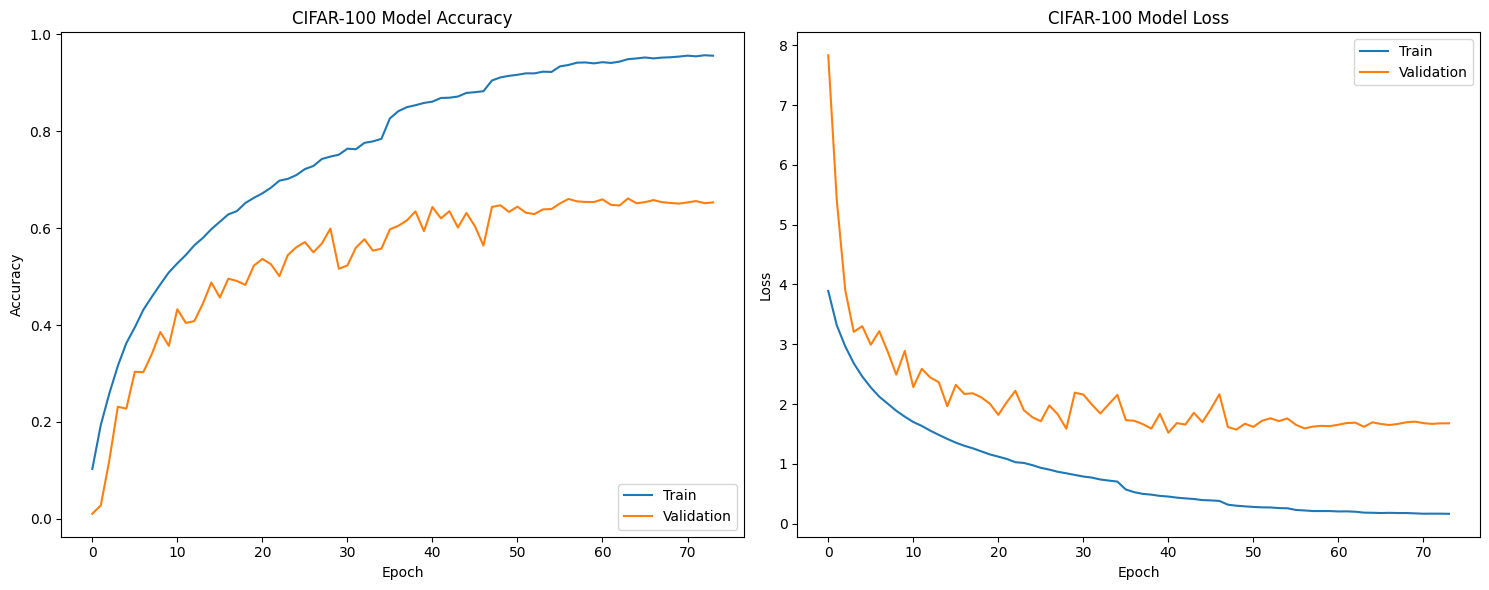

In [ ]:


plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('CIFAR-100 Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CIFAR-100 Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()

In [ ]:


test_loss, test_accuracy = model.evaluate(input_X_test, output_Y_test, verbose=VERBOSE)
print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


superclass_y_true = np.array([fine_to_coarse_mapping[y] for y in y_true])
superclass_y_pred = np.array([fine_to_coarse_mapping[y] for y in y_pred])

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6625 - loss: 1.6491

Test Loss: 1.6187
Test Accuracy: 0.6627
